In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
keras.datasets.mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

# 검증세트
train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
# 모델 생성
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, 
                              activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',
                             padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=10)

Train on 48000 samples
Epoch 1/10
48000/48000 [==============================] - 28s 583us/sample - loss: 0.2155 - accuracy: 0.9333
Epoch 2/10
48000/48000 [==============================] - 27s 559us/sample - loss: 0.0795 - accuracy: 0.9762
Epoch 3/10
48000/48000 [==============================] - 27s 557us/sample - loss: 0.0574 - accuracy: 0.9828
Epoch 4/10
48000/48000 [==============================] - 26s 550us/sample - loss: 0.0463 - accuracy: 0.9855
Epoch 5/10
48000/48000 [==============================] - 27s 564us/sample - loss: 0.0373 - accuracy: 0.9887
Epoch 6/10
48000/48000 [==============================] - 27s 567us/sample - loss: 0.0349 - accuracy: 0.9891
Epoch 7/10
48000/48000 [==============================] - 27s 553us/sample - loss: 0.0288 - accuracy: 0.9909
Epoch 8/10
48000/48000 [==============================] - 28s 577us/sample - loss: 0.0221 - accuracy: 0.9926
Epoch 9/10
48000/48000 [==============================] - 28s 581us/sample - loss: 0.0207 - accuracy: 0.9

In [4]:
from PIL import Image

In [33]:
image = Image.open('D:/DataScience/data/test.png')
import matplotlib.pyplot as plt
%matplotlib inline

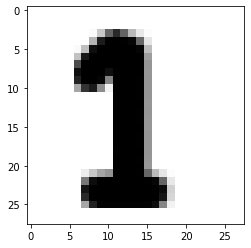

In [34]:
plt.imshow(image)

In [35]:
image.size

(28, 28)

In [36]:
import numpy as np
image = ((np.array(image) / 255)-1)*1

In [37]:
image.shape

(28, 28)

- https://www.photopea.com/

In [38]:
image = np.reshape(image, (1, 28, 28, 1))

In [39]:
a = model.predict(image)

In [40]:
a

array([[1.8193142e-03, 5.7221341e-01, 2.1637888e-01, 9.4130475e-05,
        6.0862005e-03, 1.1188781e-01, 1.7549437e-02, 2.4964523e-03,
        7.0633017e-02, 8.4137113e-04]], dtype=float32)

In [41]:
max(a[0])

0.5722134

In [42]:
list(a[0]).index(max(a[0]))

1